# Laboratorio Integrador
### Se aplica Analisis de Espacio de Color, Muestreo Espacial, Cuantización y Segmentación Simple por Color

Importamos las librerias necesarias para el Laboratorio:

* NumPy para trabajar con matrices
* OpenCV (cv2) para procesar las imágenes
* Matplotlib para poder visualizar las imágenes

In [ ]:
# Importamos las librerias necesarias
import numpy as np
from cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
#Se define función para obenter información de la imagen
def info_img(img):
    print('tamaño =', img.shape)
    print('máximo =', np.max(img))
    print('mínimo =', np.min(img))

In [ ]:
#Elegimos una imagen y la cargamos para trabajar con la misma
!wget https://img.freepik.com/fotos-premium/gran-grupo-frutas-verduras-frescas_135427-2732.jpg

--2025-04-23 01:38:04--  https://img.freepik.com/fotos-premium/gran-grupo-frutas-verduras-frescas_135427-2732.jpg
Resolving img.freepik.com (img.freepik.com)... 23.53.35.11, 23.53.35.12, 2a02:26f0:5900::b832:7299, ...
Connecting to img.freepik.com (img.freepik.com)|23.53.35.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67688 (66K) [image/jpeg]
Saving to: ‘gran-grupo-frutas-verduras-frescas_135427-2732.jpg’

gran-grupo-frutas-v 100%[===================>]  66.10K   287KB/s    in 0.2s    

2025-04-23 01:38:05 (287 KB/s) - ‘gran-grupo-frutas-verduras-frescas_135427-2732.jpg’ saved [67688/67688]



##A. Cargamos imagen con OpenCV

In [ ]:
#Cargamos imagen con cv2
img_cv = imread('gran-grupo-frutas-verduras-frescas_135427-2732.jpg')


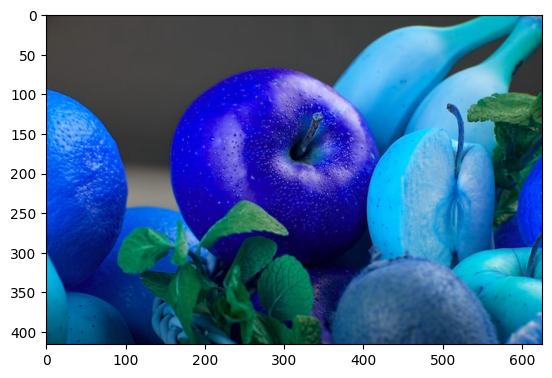

tamaño = (416, 626, 3)
máximo = 255
mínimo = 0


In [ ]:
#Mostramos imagen que opencv maneja los canales BGR, como vimos en clase por su forma de almacenar los mismos
img = img_cv[:,:,:]
plt.imshow(img)
plt.show()
#Utilizamos la función info_img para ver caracteristicas de la imagen
info_img(img_cv)

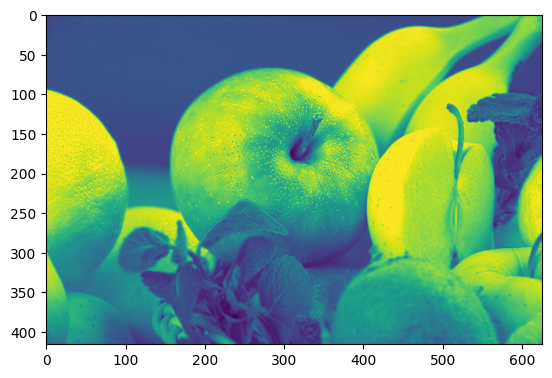

tamaño = (416, 626)
máximo = 255
mínimo = 0


In [ ]:
# Separación de canales de color
rojo = img[:,:,2]
#Mostramos imagen por canal separado
plt.imshow(rojo)
plt.show()
#Utilizamos la función info_img para ver caracteristicas de la imagen
info_img(rojo)

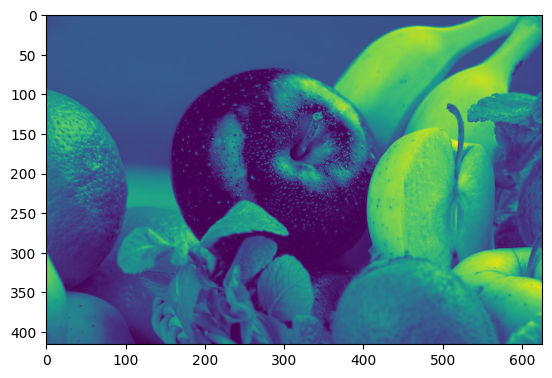

tamaño = (416, 626)
máximo = 242
mínimo = 0


In [ ]:
verde = img[:,:,1]
#Mostramos imagen por canal separado
plt.imshow(verde)
plt.show()
#Utilizamos la función info_img para ver caracteristicas de la imagen
info_img(verde)

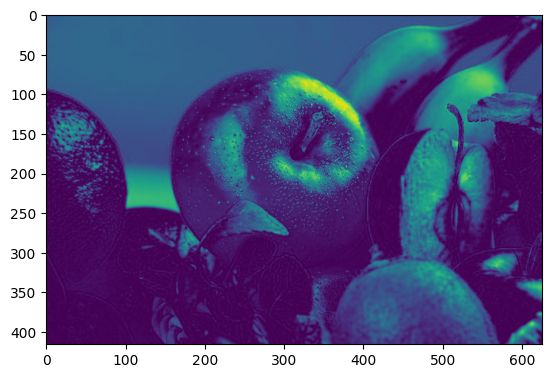

tamaño = (416, 626)
máximo = 218
mínimo = 0


In [ ]:
azul = img[:,:,0]
#Mostramos imagen por canal separado
plt.imshow(azul)
plt.show()
#Utilizamos la función info_img para ver caracteristicas de la imagen
info_img(azul)

##B. Identificamos que el canal con mayor información es el rojo, ya que presenta un maximo de 255

##C. Conversion de BGR a RGB

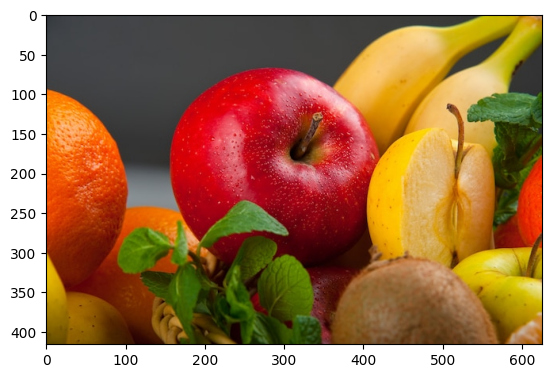

In [ ]:
# Para conversión BGR a RGB utilizamos esta opción, existen muchas opciones
img = img_cv[:,:,[2,1,0]]          # BGR a RGB
plt.imshow(img)
plt.show()

# Muestreo y Cuantización en Procesamiento de Imágenes

In [ ]:
# Copiamos Imagen Original
X = img.copy()
X = X[:,:,0]               # Toma solo el primer canal (rojo)

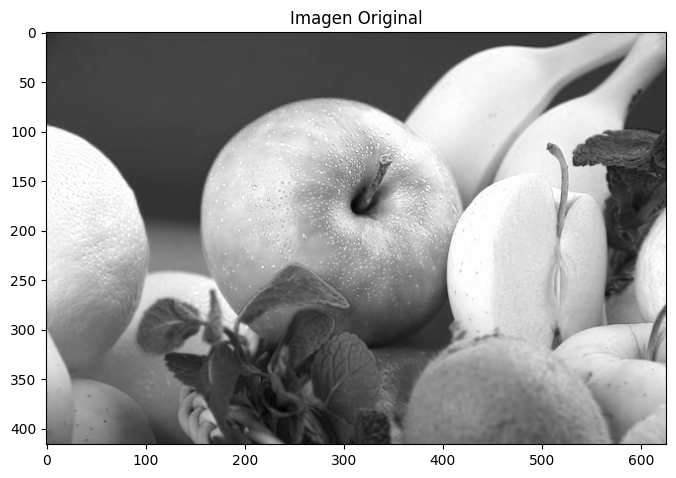

tamaño = (416, 626)
máximo = 255
mínimo = 0


In [ ]:
# Muestra la imagen original
plt.figure(figsize=(8,8))   # Crea figura de 8x8 pulgadas
plt.imshow(X, cmap='gray')  # Muestra imagen en escala de grises
plt.title('Imagen Original')
plt.show()
info_img(X)

## Muestreo Espacial

###A. Aplicamos el muestreo espacial para factores 2, 4 y 8

### El muestreo espacial reduce la resolución de una imagen ya que va tomando píxeles a intervalos regulares.

In [ ]:
da = 2   # Factor de muestreo: toma 1 pixel cada 'da' pixeles
(Nx,Mx) = X.shape          # Obtiene dimensiones de imagen original
ix = range(0,Nx,da)         # Crea secuencia de 0 a Nx saltando de da en da
jx = range(0,Mx,da)         # Igual para columnas
Nya = len(ix)               # Nueva altura = número de filas a tomar
Mya = len(jx)               # Nueva anchura = número de columnas a tomar

In [ ]:
# Se crea ciclo de extracción de pixeles para armar nueva imagen muestreada "Ya"
Ya = np.zeros((Nya,Mya), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Nya):              # Para cada fila
    for j in range(Mya):          # Para cada columna
        Ya[i,j] = X[ix[i],jx[j]]  # Copia el pixel correspondiente

In [ ]:
#Llevamos a cabo el mismo proceso anterior, pero esta vez con otro Factor de muestreo
db = 4
(Nx,Mx) = X.shape
ix = range(0,Nx,db)
jx = range(0,Mx,db)
Nyb = len(ix)
Myb = len(jx)

In [ ]:
# Se crea ciclo de extracción de pixeles para armar nueva imagen muestreada "Yb"
Yb = np.zeros((Nyb,Myb), np.uint8)
for i in range(Nyb):
    for j in range(Myb):
        Yb[i,j] = X[ix[i],jx[j]]

In [ ]:
#Llevamos a cabo el mismo proceso anterior, pero esta vez con otro Factor de muestreo
dc = 8
(Nx,Mx) = X.shape
ix = range(0,Nx,dc)
jx = range(0,Mx,dc)
Nyc = len(ix)
Myc = len(jx)

In [ ]:
# Se crea ciclo de extracción de pixeles para armar nueva imagen muestreada "Yc"
Yc = np.zeros((Nyc,Myc), np.uint8)
for i in range(Nyc):
    for j in range(Myc):
        Yc[i,j] = X[ix[i],jx[j]]

###B. Mostramos imagen original y los distintos resultados con factores de reducción y sus respectivos tamaños

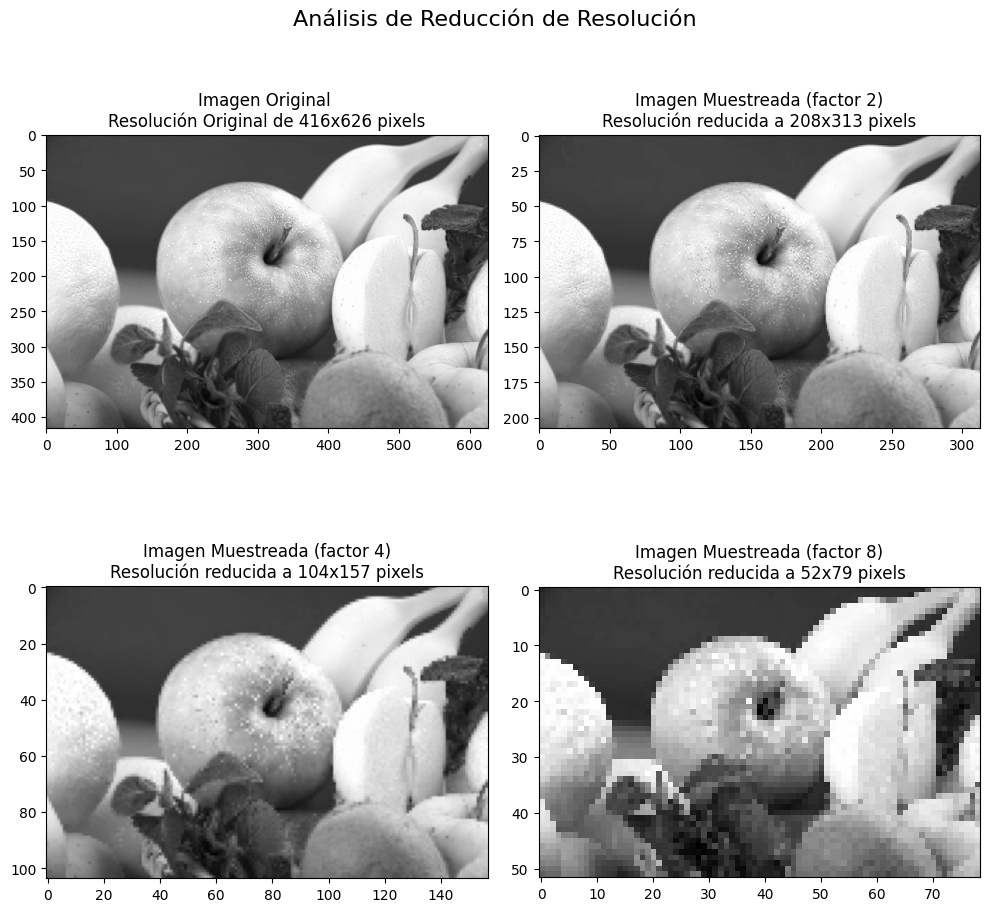

In [ ]:
#Vamos a mostrar la imagen original y las imagenes creadas con los distintos factores para apreciar los cambios
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Análisis de Reducción de Resolución', fontsize=16)

# Imagen Original
axes[0,0].imshow(X, cmap='gray')
axes[0,0].set_title('Imagen Original \n' f'Resolución Original de {Nx}x{Mx} pixels')

# Factor 2
axes[0,1].imshow(Ya, cmap='gray')
axes[0,1].set_title(f'Imagen Muestreada (factor {da})\n' f'Resolución reducida a {Nya}x{Mya} pixels')


# Factor 4
axes[1,0].imshow(Yb, cmap='gray')
axes[1,0].set_title(f'Imagen Muestreada (factor {db})\n' f'Resolución reducida a {Nyb}x{Myb} pixels')


# Factor 8
axes[1,1].imshow(Yc, cmap='gray')
axes[1,1].set_title(f'Imagen Muestreada (factor {dc})\n' f'Resolución reducida a {Nyc}x{Myc} pixels')


plt.tight_layout()
plt.show()

###Al experimentar con diferentes valores del factor_muestreo (2, 4, 8, etc.) observamos que en las distintas pruebas llevadas a cabo se aprecia una perdida de calidad visual de la imagen original utilizada. En cuanto al tamaño de las imágenes se observa una reducción que es proporcional al factor ingresado. Por último se puede observar una notoria perdida de calidad a partir del factor 4.

## Cuantizacion

### C. Aplicamos cuantización de la imagen original utilizando los distintos  factores 32, 64, 128 y 256

###La cuantización reduce el número de niveles de gris en una imagen.

In [ ]:
#Aplicamos un factor de cuantización "qa" para asignarlos a la imagen "Za" y observar los cambios
qa = 32                 # Factor de cuantización
Za = np.floor(X/qa)*qa     # Divide por qa, redondea hacia abajo y multiplica por qa
Za = Za.astype(np.uint8)   # Convierte a enteros 0-255

In [ ]:
#Repetimos el mismo proceso pero para otro factor de cuantizacion "qb" que asignaremos a la imagen "Zb"
qb = 64
Zb = np.floor(X/qb)*qb
Zb = Zb.astype(np.uint8)

In [ ]:
#Repetimos el mismo proceso pero para otro factor de cuantizacion "qc" que asignaremos a la imagen "Zc"
qc = 128
Zc = np.floor(X/qc)*qc
Zc = Zc.astype(np.uint8)

In [ ]:
#Repetimos el mismo proceso pero para otro factor de cuantizacion "qd" que asignaremos a la imagen "Zd"
qd = 256
Zd = np.floor(X/qd)*qd
Zd = Zd.astype(np.uint8)

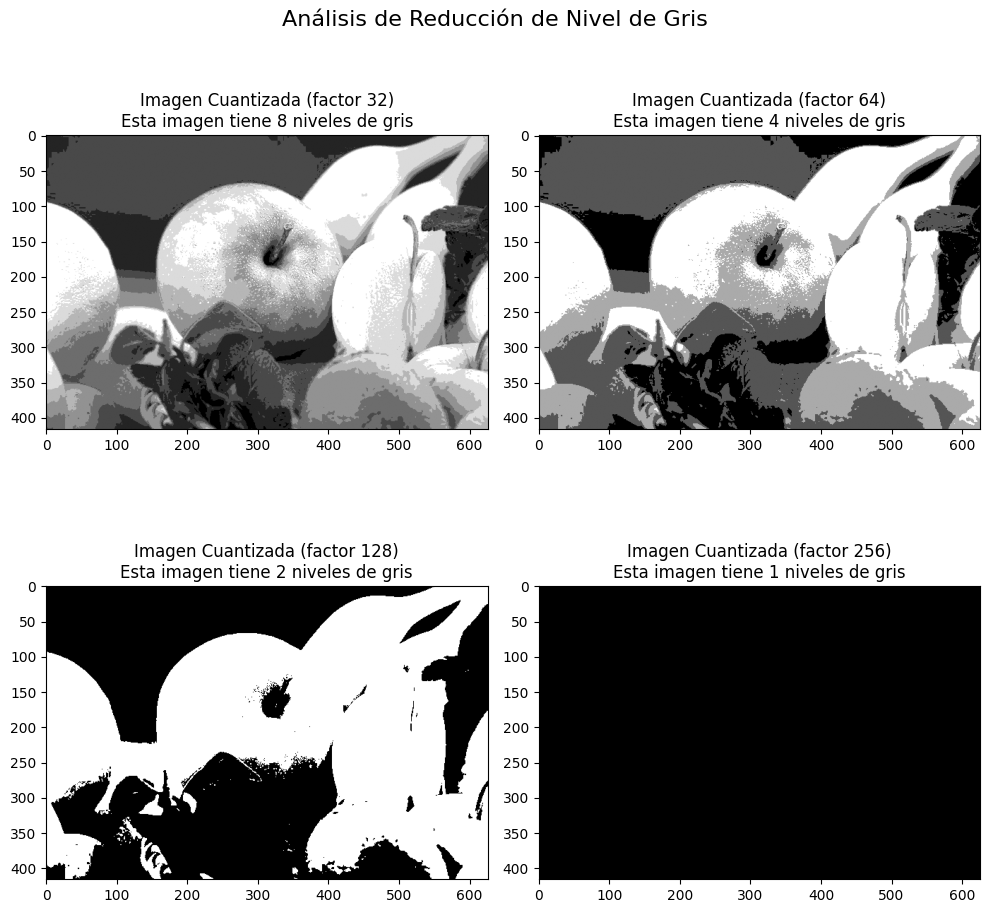

In [ ]:
#Vamos a mostrar las imagenes creadas con los distintos factores para apreciar los cambios
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Análisis de Reducción de Nivel de Gris', fontsize=16)

# Imagen Cuantizada A - Factor 32
axes[0,0].imshow(Za, cmap='gray')
axes[0,0].set_title(f'Imagen Cuantizada (factor {qa})\n' f'Esta imagen tiene {int(256/qa)} niveles de gris')


# Imagen Cuantizada B - Factor 64
axes[0,1].imshow(Zb, cmap='gray')
axes[0,1].set_title(f'Imagen Cuantizada (factor {qb})\n' f'Esta imagen tiene {int(256/qb)} niveles de gris')


# Imagen Cuantizada C - Factor 128
axes[1,0].imshow(Zc, cmap='gray')
axes[1,0].set_title(f'Imagen Cuantizada (factor {qc})\n' f'Esta imagen tiene {int(256/qc)} niveles de gris')


# Imagen Cuantizada D - Factor 256
axes[1,1].imshow(Zd, cmap='gray')
axes[1,1].set_title(f'Imagen Cuantizada (factor {qd})\n' f'Esta imagen tiene {int(256/qd)} niveles de gris')

plt.tight_layout()
plt.show()

###D. Identificamos que en la imagen con 8 niveles de grises (factor 32) ya puede apreciarse una degradacion.

## Histogramas

Vamos a configurar y mostrar los histogramas de la imagen original y de las imagenes donde se aplicó la cuantización y poder observar la distribución de los niveles de gris en cada una de las imagenes.

In [ ]:
#definimos ciclo para la configuración del histograma
def hist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

VISUALIZACIÓN DE HISTOGRAMAS

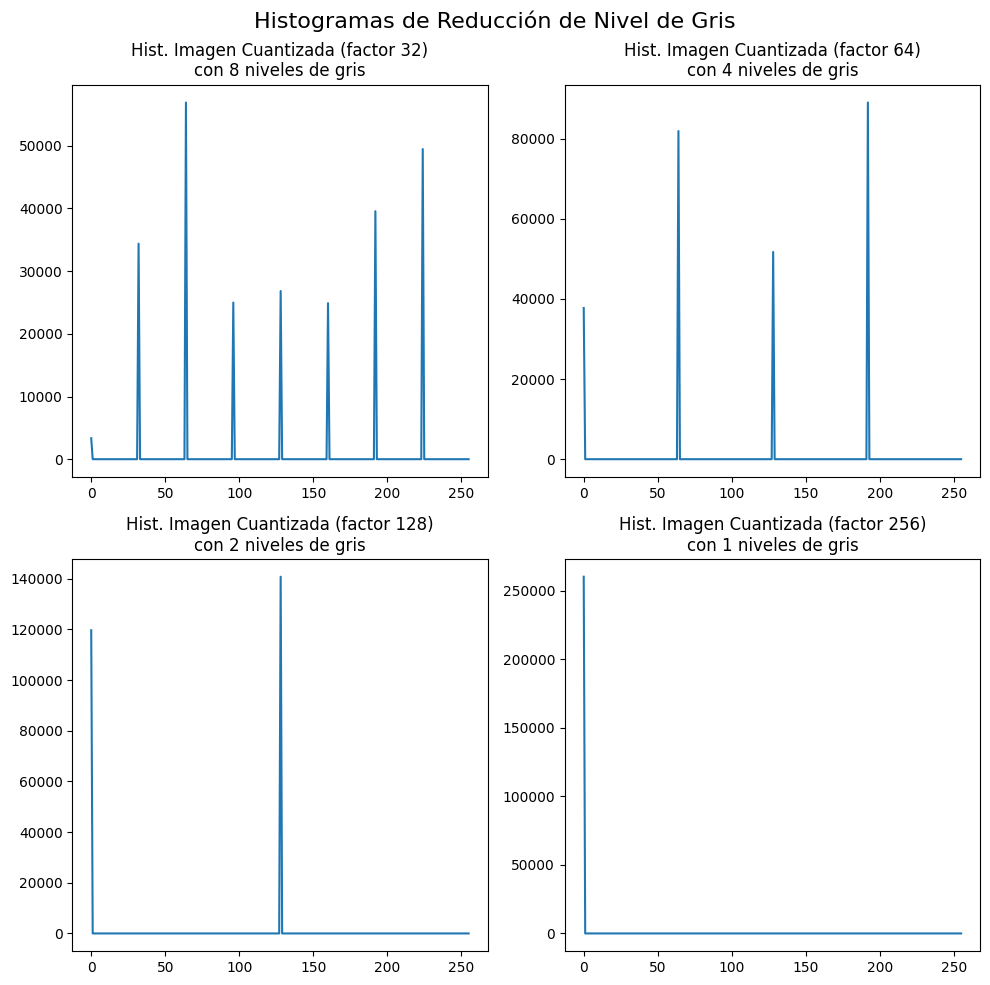

In [ ]:
#Vamos a mostrar el histograma de la imagen original y las imagenes creadas para apreciar los cambios
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Histogramas de Reducción de Nivel de Gris', fontsize=16)

# Imagen Cuantizada A - Factor 32
axes[0,0].plot(hist(Za))
axes[0,0].set_title(f'Hist. Imagen Cuantizada (factor {qa})\n' f'con {int(256/qa)} niveles de gris')


# Imagen Cuantizada B - Factor 64
axes[0,1].plot(hist(Zb))
axes[0,1].set_title(f'Hist. Imagen Cuantizada (factor {qb})\n' f'con {int(256/qb)} niveles de gris')


# Imagen Cuantizada C - Factor 128
axes[1,0].plot(hist(Zc))
axes[1,0].set_title(f'Hist. Imagen Cuantizada (factor {qc})\n' f'con {int(256/qc)} niveles de gris')

# Imagen Cuantizada D - Factor 256
axes[1,1].plot(hist(Zd))
axes[1,1].set_title(f'Hist. Imagen Cuantizada (factor {qd})\n' f'con {int(256/qd)} niveles de gris')

plt.tight_layout()
plt.show()

###Al experimentar con diferentes valores del factor_cuantizacion (32, 64, 128, etc.) observamos que en las distintas pruebas llevadas a cabo se aprecia una reducción de niveles de grises en comparación a la imagen original utilizada. En cuanto a los histogramas se observan cada vez que aumenta el factor de cuantizacion, menos picos. Por último se observa que mientras mayor es el factor de cuantización, más notorio es el efecto en la reducción de niveles de grises en cada imagen.

# Segmentación por Color

tamaño = (416, 626)
máximo = 228
mínimo = 1


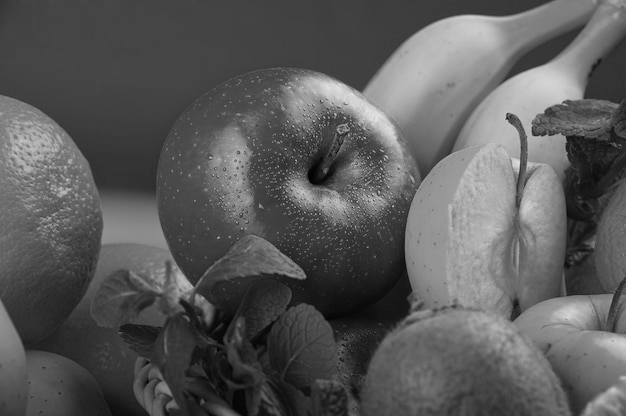

In [ ]:
# Conversión a escala de grises
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)
# Promedio ponderado
peso = (1/3,1/3,1/3)
#peso = (0.6,0.3,0.3)  # pesos alternativos
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
gris = gris_f.astype(int)
info_img(gris)
cv2_imshow(gris)

### Calculamos y mostramos un histograma de la imagen en escala de grises.

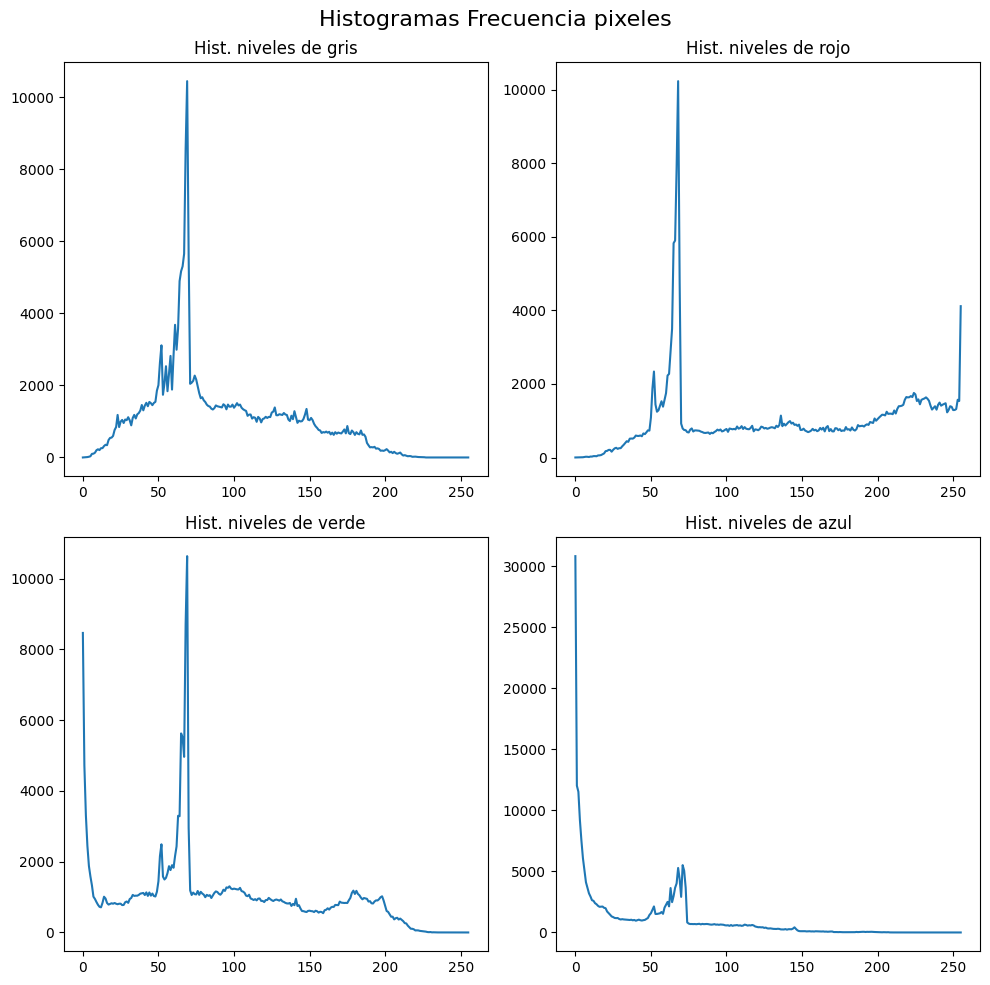

In [ ]:
#Vamos a mostrar los histogramas de la imagen gris y de cada canal en particular
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Histogramas Frecuencia pixeles', fontsize=16)

# Imagen escala grises
axes[0,0].plot(hist(gris))
axes[0,0].set_title('Hist. niveles de gris')


# Imagen canal rojo
axes[0,1].plot(hist(rojo))
axes[0,1].set_title('Hist. niveles de rojo')


# Imagen canal verde
axes[1,0].plot(hist(verde))
axes[1,0].set_title('Hist. niveles de verde')

# Imagen canal azul
axes[1,1].plot(hist(azul))
axes[1,1].set_title('Hist. niveles de azul')

plt.tight_layout()
plt.show()

### Implementamos una segmentación para extraer un objeto ("manzana roja") usando umbrales en los canales RGB.

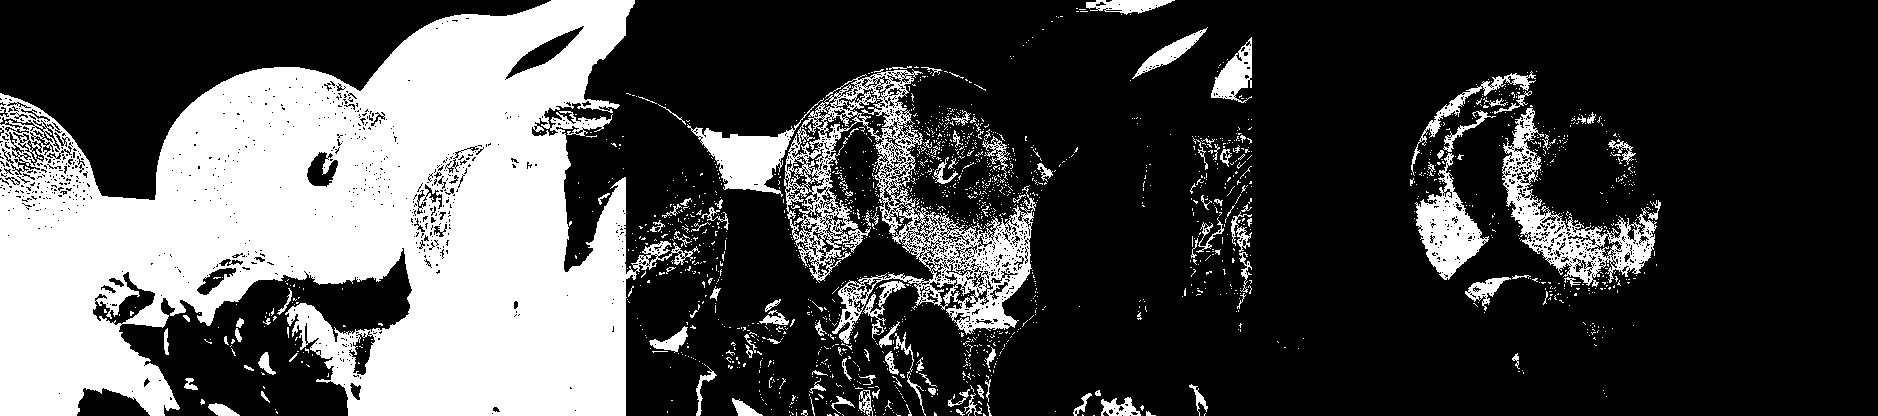

In [ ]:
# Segmentación de la manzana roja
seg_r =  (rojo>80) & (rojo<255)
seg_v = (verde>0) & (verde<12) | (verde>50) & (verde<60)
seg_a = (azul>10) & (azul<25) & (verde<12)
seg_rgb = np.concatenate((seg_r,seg_v,seg_a),axis=1)
cv2_imshow(seg_rgb*255)

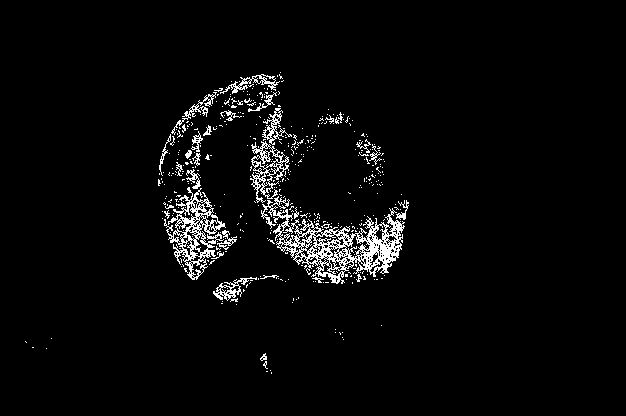

In [ ]:
#Llevamos a cabo la union logica de los canales rojo y verde
seg_ra = np.logical_and(seg_r,seg_a)
#Hacemos lo mismo entre la union logica generada en el paso anterior con el canal restante
seg = np.logical_and(seg_ra,seg_v)
cv2_imshow(seg*255)

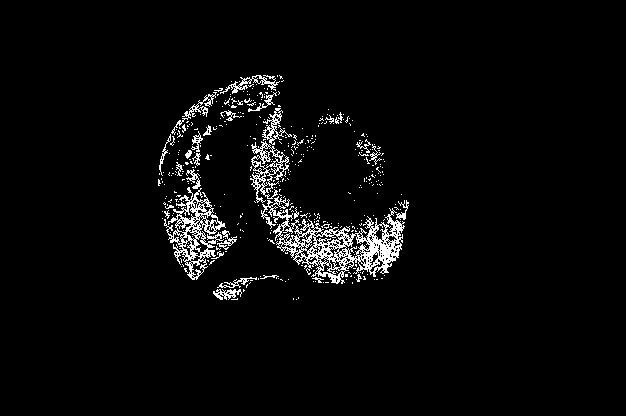

In [ ]:
# Eliminación de píxeles aislados
(N,M) = seg.shape
limpia = seg.copy()
for i in range(N):
    s = np.sum(seg[i,:])
    if s<10:
        limpia[i,:] = 0
cv2_imshow(limpia*255)

### Calculamos las coordenadas del rectángulo que encierra el objeto segmentado.

In [ ]:
#Buscamos las coordenadas del rectángulo
i_min = 1000
i_max = 0
j_min = 1000
j_max = 0
for i in range(N):
    for j in range(M):
        if limpia[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

### Dibujamos los bordes del objeto segmentado en color rojo.

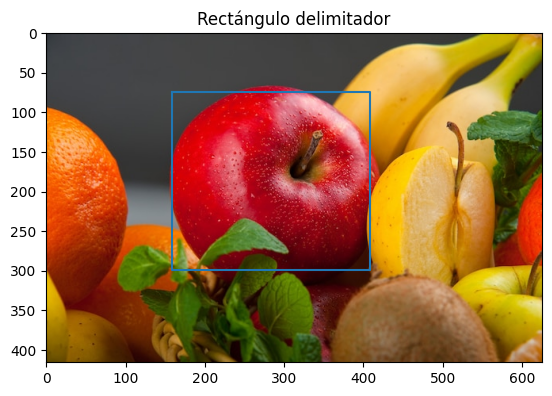

In [ ]:
# A partir de las coordenadas obtenida, dibujamos el rectángulo
y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(img)
plt.plot(x,y)
plt.title('Rectángulo delimitador')
plt.show()